📁 Upload your file (e.g., nba_advanced_stats_2024_2025.csv)


Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025 (8).csv


/tmp/ipython-input-10-3328388284.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-10-3328388284.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


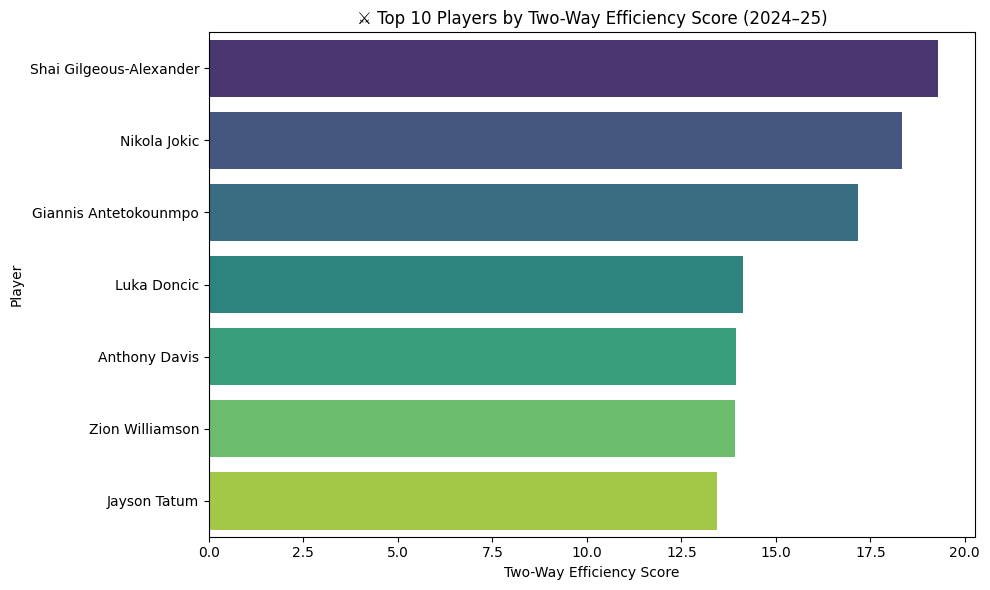

In [10]:
# 📦 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📁 Step 2: Upload CSV
print("📁 Upload your file (e.g., nba_advanced_stats_2024_2025.csv)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📊 Step 3: Load and clean
df = pd.read_csv(filename)
df.columns = df.columns.str.strip().str.upper()

# 🧼 Step 4: Filter low-sample players (relaxed threshold)
df = df[df['WS'] > 0.1]  # Lowered to allow more valid players

# 🧠 Step 5: Compute score
df['TWO_WAY_EFFICIENCY'] = (
    df['USG%'] * 0.25 +
    df['WS/48'] * 100 * 0.25 +
    df['OBPM'] * 0.25 +
    df['DBPM'] * 0.25
)

# 🥇 Step 6: Top 10 players
top10_two_way = df.sort_values('TWO_WAY_EFFICIENCY', ascending=False).head(10)

# 📊 Step 7: Plot (no error bars)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='TWO_WAY_EFFICIENCY',
    y='PLAYER',
    data=top10_two_way,
    palette='viridis',
    ci=None  # ⛔ no error bars
)
plt.title("⚔️ Top 10 Players by Two-Way Efficiency Score (2024–25)")
plt.xlabel("Two-Way Efficiency Score")
plt.ylabel("Player")
plt.tight_layout()
plt.savefig("top10_two_way_efficiency_2024_25.jpg", format='jpg', dpi=300)
plt.show()

# 💾 Step 8: Save results
top10_two_way.to_csv("top10_two_way_efficiency_2024_25.csv", index=False)